In [1]:
from dask.distributed import Client

In [2]:
client = Client()
client

Connection method: Cluster object,Cluster type: distributed.LocalCluster
Dashboard: http://127.0.0.1:8787/status,
Dashboard: http://127.0.0.1:8787/status,Workers: 4
Total threads: 8,Total memory: 16.00 GiB
Status: running,Using processes: True
Comm: tcp://127.0.0.1:50184,Workers: 4
Dashboard: http://127.0.0.1:8787/status,Total threads: 8
Started: Just now,Total memory: 16.00 GiB
Comm: tcp://127.0.0.1:50195,Total threads: 2
Dashboard: http://127.0.0.1:50199/status,Memory: 4.00 GiB
Nanny: tcp://127.0.0.1:50187,


In [8]:
import dask.dataframe as dd

# columnas que nos queremos quedar
columns = ['passenger_count', 'tip_amount']

# lista vacia para ir juntando los dfs
df_list = []

# levantamos cada archivo
for i in range(1, 13):
    file_name = f'yellow_tripdata_2015-{i:02}.parquet'
    df = dd.read_parquet(file_name, columns=columns)
    df_list.append(df)

# juntamos todo en un dataframe grande
big_df = dd.concat(df_list)

In [9]:
big_df.info()

<class 'dask_expr.DataFrame'>
Columns: 2 entries, passenger_count to tip_amount
dtypes: float64(1), int64(1)

In [10]:
len(big_df)

146039231

In [11]:
mean_tip_amount = big_df.groupby('passenger_count')['tip_amount'].mean()

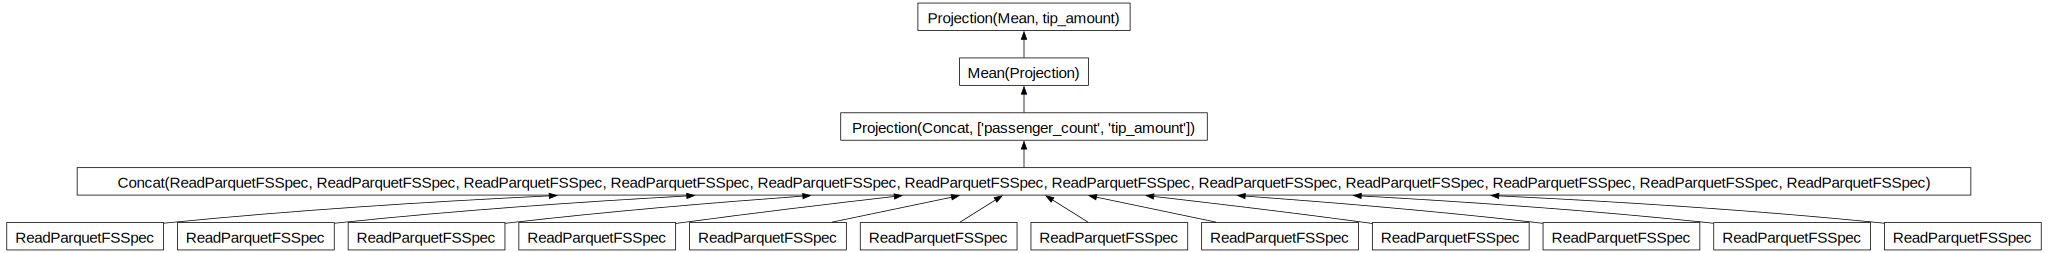

In [8]:
mean_tip_amount.visualize()

In [12]:
mean_tip_amount.compute()

passenger_count
0    1.596746
1    1.752972
2    1.706129
3    1.580011
4    1.459410
5    1.728789
6    1.680909
7    4.067709
8    5.146011
9    5.198970
Name: tip_amount, dtype: float64